## Transfer learning

In [38]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

import PIL.Image as Image
import os

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras

In [2]:
# Change working directory
os.chdir(r'C:\Users\ganga\OneDrive\Desktop\Deep learning\Transfer learning')

In [3]:
# List all files in the directory
os.listdir()

['class lables_tf.txt',
 'Gold fish.png',
 'tf2-preview_mobilenet_v2_classification_4.tar.gz']

In [4]:
# Import pre trained model from tensorflow hub
# add an rgb channel to image
image_shape = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape = image_shape+(3,))
])

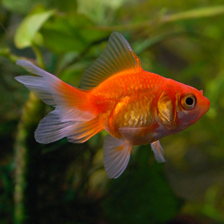

In [5]:
# Display images by using Image
gold_fish = Image.open('Gold fish.png').resize(image_shape)
gold_fish

In [6]:
# Coverting image into an array
gold_fish = np.array(gold_fish)
gold_fish

array([[[ 72,  85,  18],
        [ 80,  95,  23],
        [ 89, 107,  30],
        ...,
        [ 84, 100,   1],
        [ 82,  98,   1],
        [ 79,  94,   0]],

       [[ 73,  85,  21],
        [ 83,  97,  28],
        [ 90, 108,  33],
        ...,
        [ 82,  97,   1],
        [ 80,  95,   1],
        [ 77,  92,   0]],

       [[ 73,  85,  22],
        [ 80,  94,  26],
        [ 88, 106,  33],
        ...,
        [ 81,  96,   1],
        [ 79,  94,   2],
        [ 76,  91,   1]],

       ...,

       [[ 14,  28,   4],
        [ 13,  29,   5],
        [ 13,  31,   6],
        ...,
        [ 40,  56,  10],
        [ 40,  57,   9],
        [ 41,  57,   8]],

       [[ 16,  32,   4],
        [ 15,  34,   5],
        [ 14,  35,   5],
        ...,
        [ 35,  52,  12],
        [ 36,  53,  11],
        [ 36,  53,   9]],

       [[ 17,  37,   3],
        [ 18,  39,   5],
        [ 14,  38,   3],
        ...,
        [ 29,  46,  11],
        [ 30,  47,  10],
        [ 30,  48,   9]]

In [7]:
# Shape of the image
gold_fish.shape

(224, 224, 3)

In [8]:
# Scaling
gold_fish = gold_fish / 255.0
gold_fish

array([[[0.28235294, 0.33333333, 0.07058824],
        [0.31372549, 0.37254902, 0.09019608],
        [0.34901961, 0.41960784, 0.11764706],
        ...,
        [0.32941176, 0.39215686, 0.00392157],
        [0.32156863, 0.38431373, 0.00392157],
        [0.30980392, 0.36862745, 0.        ]],

       [[0.28627451, 0.33333333, 0.08235294],
        [0.3254902 , 0.38039216, 0.10980392],
        [0.35294118, 0.42352941, 0.12941176],
        ...,
        [0.32156863, 0.38039216, 0.00392157],
        [0.31372549, 0.37254902, 0.00392157],
        [0.30196078, 0.36078431, 0.        ]],

       [[0.28627451, 0.33333333, 0.08627451],
        [0.31372549, 0.36862745, 0.10196078],
        [0.34509804, 0.41568627, 0.12941176],
        ...,
        [0.31764706, 0.37647059, 0.00392157],
        [0.30980392, 0.36862745, 0.00784314],
        [0.29803922, 0.35686275, 0.00392157]],

       ...,

       [[0.05490196, 0.10980392, 0.01568627],
        [0.05098039, 0.11372549, 0.01960784],
        [0.05098039, 0

In [10]:
# Add a new axis to supply as number of images (model accepts more number of images)
gold = gold_fish[np.newaxis, ...]
gold.shape

(1, 224, 224, 3)

In [11]:
# Prediction
result = classifier.predict(gold)
result

1/1 [==============================] - 1s 964ms/step


array([[ 0.22101435,  2.0474896 ,  9.622563  , ..., -1.462158  ,
        -0.28146622, -0.25984925]], dtype=float32)

In [12]:
predicted_class = np.argmax(result)
predicted_class

2

In [15]:
# List all lables by reading file
class_labels = []
with open('class lables_tf.txt', 'r') as f:
    class_labels = f.read().splitlines()

In [17]:
class_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [19]:
class_labels[predicted_class]

'goldfish'

In [20]:
# Load flower data set
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 771s 3us/step


In [21]:
# Flowers directory
data_dir

'.\\datasets\\flower_photos'

In [23]:
# Convert into windows path
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [26]:
# By using glob function we can return all elements by providing condition
flower_images = list(data_dir.glob('*/*.jpg'))
flower_images[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [29]:
len(flower_images)

3670

In [30]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

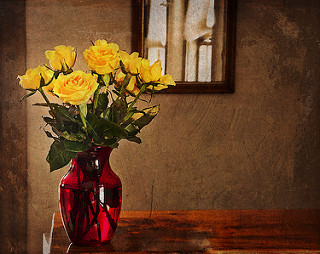

In [32]:
Image.open(str(roses[18]))

In [34]:
# Create a dictionary of images
flower_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [36]:
flower_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [37]:
# Creating a dictionary of labels
flower_lables_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [43]:
tulip_image = cv2.imread(str(flower_images_dict['tulips'][7]))
tulip_image.shape

(231, 320, 3)

In [44]:
cv2.resize(tulip_image,(224,224)).shape

(224, 224, 3)

In [45]:
# creating x and y variables by reading and resizing all images in same shape
X, y = [], []
for flower_names, images in flower_images_dict.items():
    for i in images:
        image = cv2.imread(str(i))
        resized_image = cv2.resize(image, (224, 224))
        X.append(resized_image)
        y.append(flower_lables_dict[flower_names])

In [57]:
X[0].shape

(224, 224, 3)

In [52]:
y[:5]

[0, 0, 0, 0, 0]

In [55]:
X = np.array(X)
y = np.array(y)

In [61]:
# Splitting data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [62]:
# Scaling
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

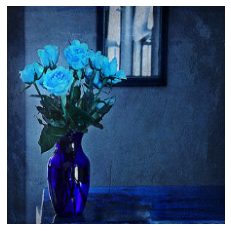

In [81]:
plt.axis('off')
plt.imshow(X[18]);

In [83]:
# Predictions
pred = classifier.predict(np.array([X[18]]))
pred

1/1 [==============================] - 1s 1s/step


array([[ 0.1416961 , -0.66150695,  1.1255175 , ..., -0.62251616,
        -0.70220697,  3.8933032 ]], dtype=float32)

In [84]:
pred = np.argmax(pred)
pred

795

In [86]:
class_labels[pred]

'shower curtain'

In [87]:
# Pre trained model without last layer
feature_extraction_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [89]:
pre_trained_model_without_last_layer = hub.KerasLayer(feature_extraction_model, input_shape = (224, 224, 3),
                                                      trainable=False)

In [90]:
# Training model with classes
classes = 5
model = tf.keras.Sequential([
    pre_trained_model_without_last_layer,
    tf.keras.layers.Dense(classes)
])

In [91]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [92]:
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [94]:
model.fit(X_train_scaled, y_train, epochs=4)

Epoch 1/4
92/92 [==============================] - 72s 780ms/step - loss: 0.4251 - accuracy: 0.8508
Epoch 2/4
92/92 [==============================] - 65s 711ms/step - loss: 0.3259 - accuracy: 0.8951
Epoch 3/4
92/92 [==============================] - 64s 700ms/step - loss: 0.2669 - accuracy: 0.9142
Epoch 4/4
92/92 [==============================] - 70s 759ms/step - loss: 0.2289 - accuracy: 0.9309
